In [1]:
import pandas as pd
import torch
import numpy as np
%matplotlib inline

In [3]:
from kale_flow_master.kernel_wasserstein_flows.kernel_wasserstein_flows.gradient_flow import gradient_flow
from kale_flow_master.kernel_wasserstein_flows.kernel_wasserstein_flows.kernels import gaussian_kernel
from kale_flow_master.kernel_wasserstein_flows.kernel_wasserstein_flows.kale import kale_penalized, kale_penalized_first_variation

In [5]:
import logging

from kale_flow_master.kernel_wasserstein_flows.kernel_wasserstein_flows.config import LOG_LEVELS
LOG_LEVELS['gradient_flow'] = logging.INFO

In [6]:
results = {}

In [20]:
from PIL import Image
def _load_img(fn='images/heart.png', size=200, max_samples=None):
    r"""Returns x,y of black pixels (between -1 and 1)
    """
    pic = np.array(Image.open(fn).resize((size,size)).convert('L'))
    y_inv, x = np.nonzero(pic<=128)
    y = size - y_inv - 1
    if max_samples and x.size > max_samples:
        ixsel = np.random.choice(x.size, max_samples, replace=False)
        x, y = x[ixsel], y[ixsel]
    return np.stack((x, y), 1) / size * 2 - 1

def _get_shapes_data():
    rs = np.random.RandomState(42)
    X = _load_img('images/spiral3d.jpg')
    X = X[rs.choice(len(X), 20, replace=False)]

    Y = _load_img('images/heart.png')
    Y = Y[rs.choice(len(Y), 20, replace=False)]

    Y = torch.from_numpy(Y).float()
    X = torch.from_numpy(X).float()
    Y.requires_grad = True
    return X, Y

# KALE Flow

In [21]:
_gf_default_kwargs = dict(
    # max_iter=100,
    random_seed=20,
    noise_level_callback=lambda x: 1e-20,
    num_noisy_averages=1,
    generator=_get_shapes_data,
    generator_kwargs=dict(),
    kernel=gaussian_kernel,
    kernel_kwargs={'sigma': 0.01},
    loss=kale_penalized,
    loss_first_variation=kale_penalized_first_variation
)

_kale_default_kwargs={
    "inner_max_iter": 800,
    "inner_tol": 1e-8,
    "inner_a": 0.4,
    "inner_b": 0.8,
    "inplace": False,
    "input_check":True,
    "dual_gap_tol": 5e-2,
    # "optimization_method":"newton",
    "optimization_method":"cd", "optimizer_kwargs": {"dual_gap_tol": 5e-2, "buffer_size": 1000, "max_iter": 20}, "online": True,
}

In [22]:
import time 
from kale_flow_master.kernel_wasserstein_flows.kernel_wasserstein_flows.kale import kale_penalized, kale_penalized_first_variation

for max_iter, lr, _lambda_, exp_name in zip([100, 100], [0.001, 1], [0.001, 10000], ['kale_0001', 'kale_10000']):
    # _lambda_ = 10000 amounts to MMD
    X, Y = _get_shapes_data()
    t0 = time.time()
    args, (X, Y), (trajectories, records, loss_states) = gradient_flow(max_iter=max_iter, lr=lr, loss_kwargs={"lambda_": _lambda_, **_kale_default_kwargs}, **_gf_default_kwargs)
    print(f'total time {time.time() - t0:.3f}s')
    results[exp_name] = {'args': args, 'X': X, 'Y': Y, 'trajectories': trajectories, 'records': records, 'loss_states': loss_states }

 gradient_flow: X.requires_grad: False, Y.requires_grad: True
 gradient_flow: loss: 3.10e+01 grad_norm: 1.00e+03
 gradient_flow: loss: 2.32e+01 grad_norm: 4.28e+02
 gradient_flow: loss: 2.71e+01 grad_norm: 5.04e+02
 gradient_flow: loss: 2.38e+01 grad_norm: 4.76e+02
 gradient_flow: loss: 2.59e+01 grad_norm: 3.38e+00
 gradient_flow: loss: 2.59e+01 grad_norm: 1.84e+01
 gradient_flow: loss: 2.59e+01 grad_norm: 4.77e+00
 gradient_flow: loss: 2.38e+01 grad_norm: 3.57e+02
 gradient_flow: loss: 2.58e+01 grad_norm: 3.04e+01
 gradient_flow: loss: 2.43e+01 grad_norm: 2.24e+02
 gradient_flow: X.requires_grad: False, Y.requires_grad: True
 gradient_flow: loss: 5.59e-02 grad_norm: 1.29e+00
 gradient_flow: loss: 5.33e-02 grad_norm: 4.16e-01
 gradient_flow: loss: 5.16e-02 grad_norm: 4.08e-01


total time 0.383s


 gradient_flow: loss: 5.11e-02 grad_norm: 6.49e-01
 gradient_flow: loss: 5.44e-02 grad_norm: 1.15e-01
 gradient_flow: loss: 5.46e-02 grad_norm: 1.17e-02
 gradient_flow: loss: 5.31e-02 grad_norm: 4.37e-01
 gradient_flow: loss: 5.25e-02 grad_norm: 3.31e-01
 gradient_flow: loss: 5.54e-02 grad_norm: 4.94e-01
 gradient_flow: loss: 5.46e-02 grad_norm: 1.38e-02


total time 0.380s


# KKL Flow

In [26]:
import divergences as dv
import kernels as kl
import generate_y as gy 
import matplotlib.pyplot as plt

import cProfile

In [27]:
## PARAMETERS KKL ##
alpha = 0.01

## KERNEL ###
sigma = 0.3
k = lambda x,y :  kl.k_gauss(x,y,sigma)
dk = lambda x,y : kl.dk_gauss(x, y,sigma)

##DATA##
y,x = _get_shapes_data()
x = x.detach().numpy()
y = y.detach().numpy()
n = len(x)
m = len(y)


###### Ky ####
Ky = 1/m * k(y,y) 
Ly,V = np.linalg.eig(Ky)
V = V.transpose()
Ly = np.real(Ly)
Packy = [Ky,Ly,V]

hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
hop
total time : 1.1906418800354004


Text(0.5, 1.0, 'Values of the gradient of $KKL_{\\alpha}')

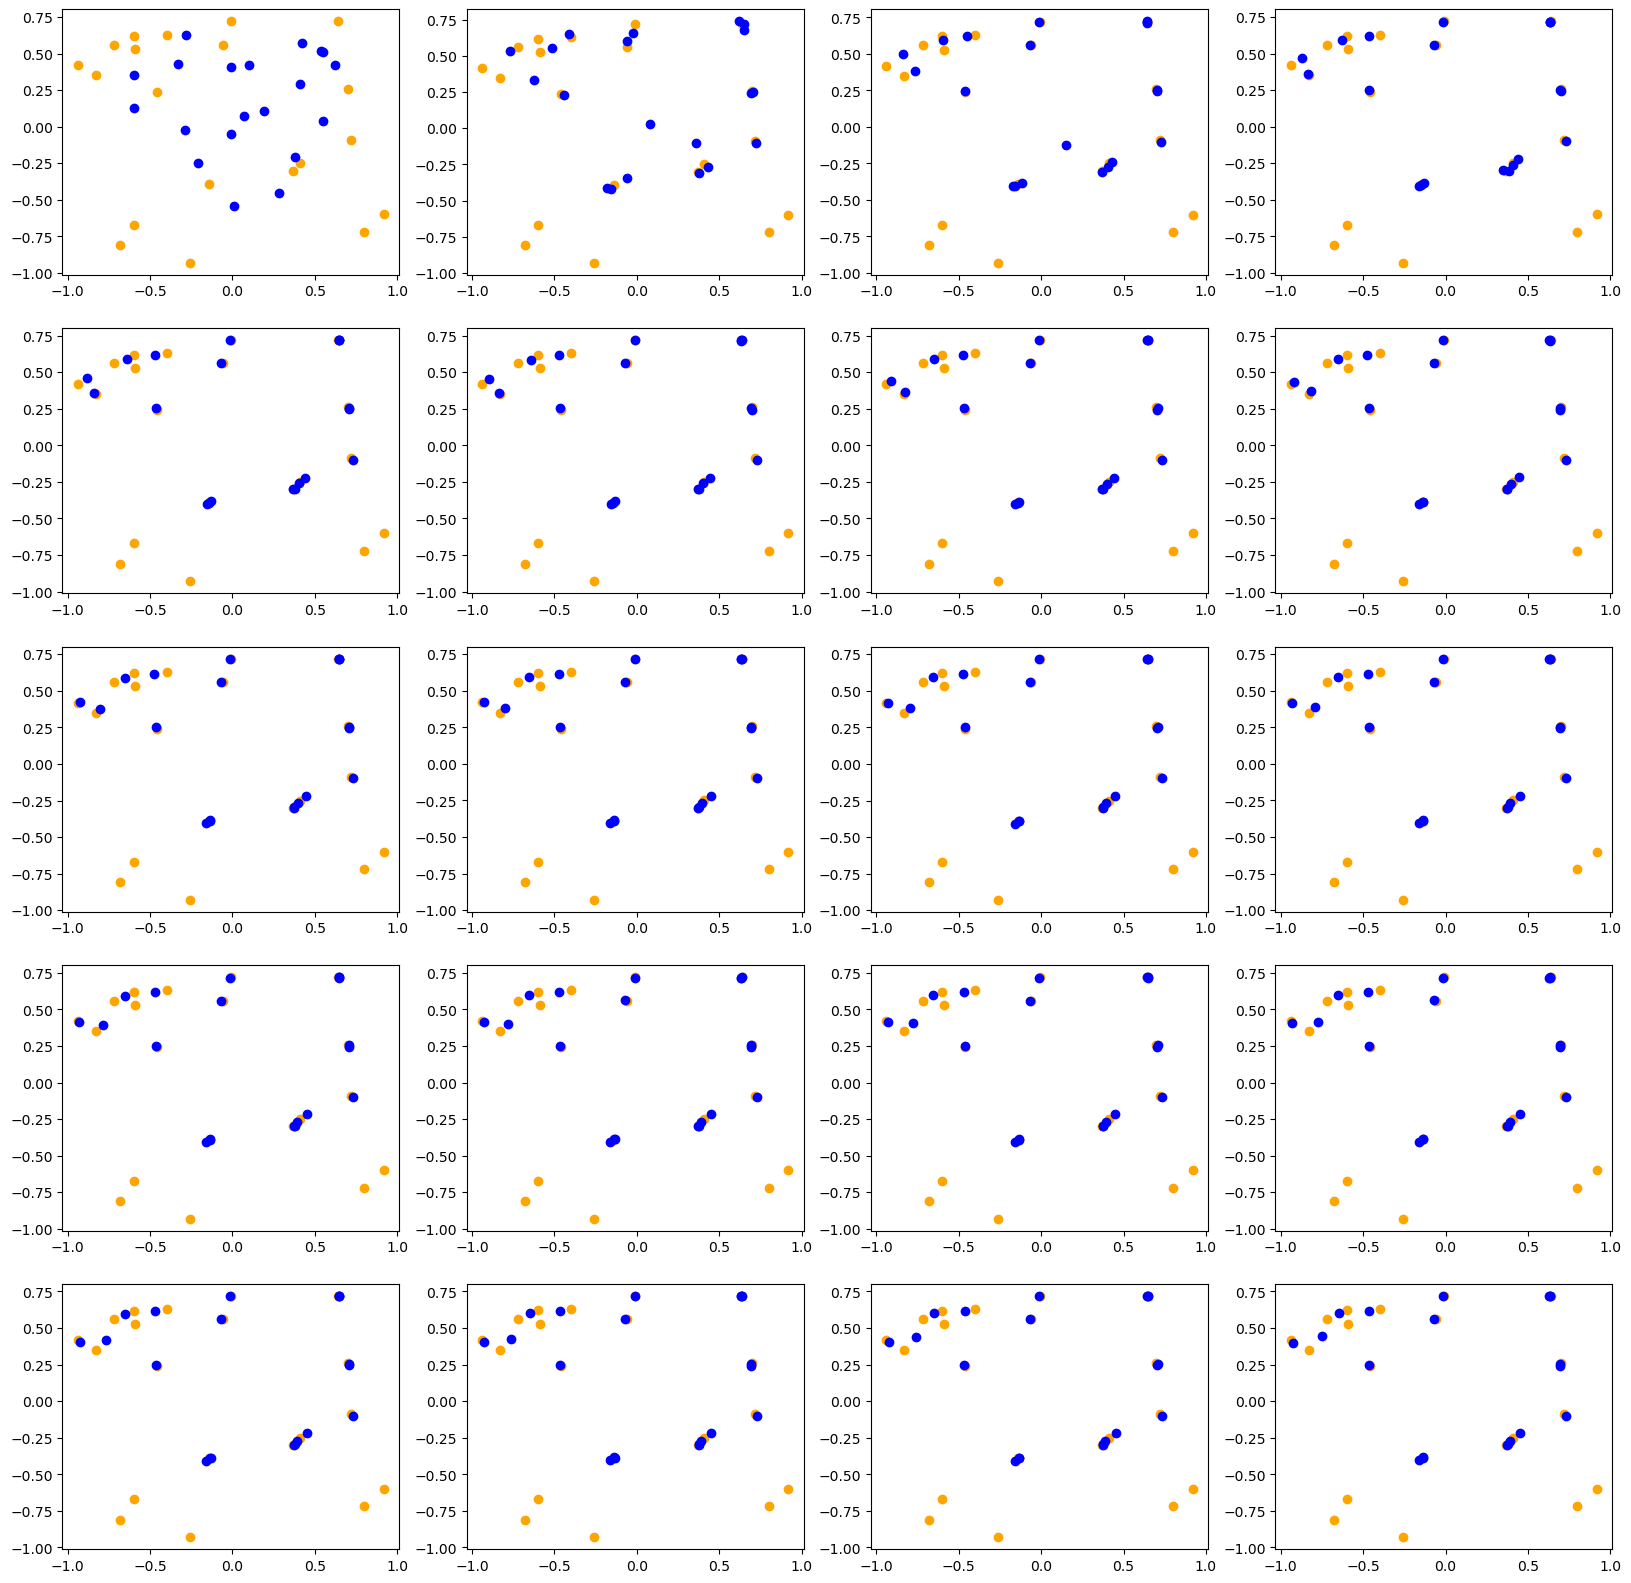

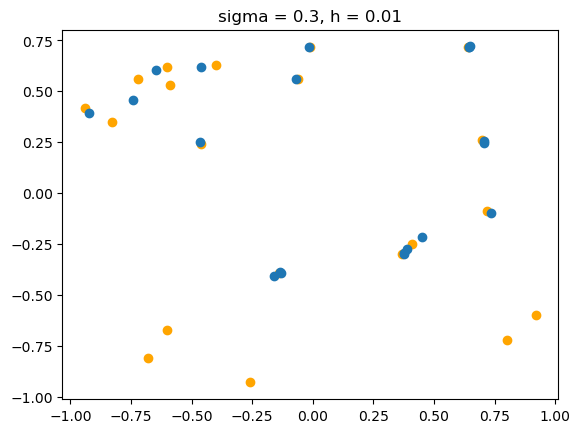

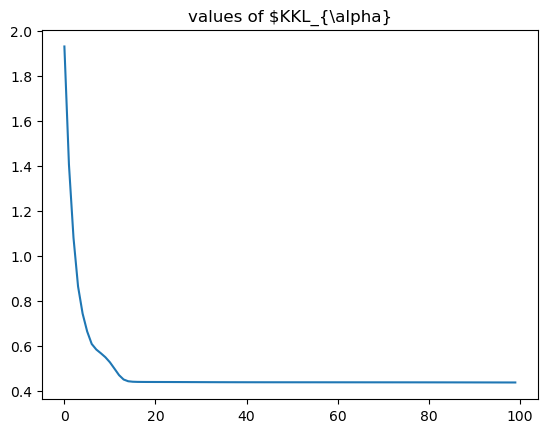

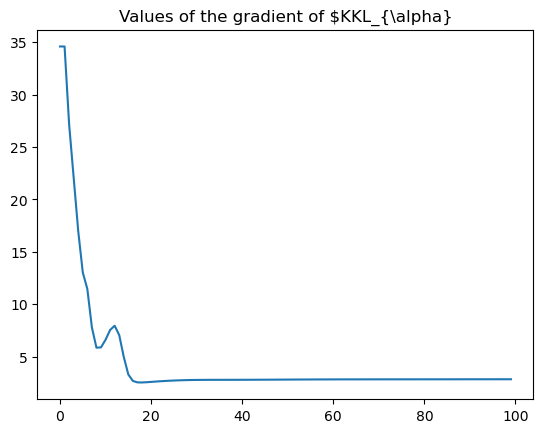

In [28]:
import divergences as dv
import kernels as kl
import gradient_descent as gd
import generate_y as gy
import cProfile
import time

##############################
######## PARAMETERS ##########
##############################

n = len(x)
m = len(y)
T = 100 # nombre d'itérations
h = 0.01 # stepsize gradient descent
eps = 0.0001
alpha = 0.01


#### DIVERGENCE ####
x0 = x
J = lambda x : dv.KKL(x, y, k, Packy, alpha) 
dJ = lambda x : dv.WGrad_KKL(x, y, k, dk, Packy, alpha, sigma) 



###########################################
############ GRADIENT DESCENT #############
###########################################


t0 = time.time()
X,l_J,Grad = gd.gradient_descent(J, dJ, x0, h, eps, T)
#cProfile.run('gd.gradient_descent(J, dJ, x0, h, eps, T)')
print("total time : " + str(time.time()-t0))
############################
########## PLOTS ###########
############################

fig, axs = plt.subplots(5, 4, figsize=(20,20))
for i in range(0,len(X)-1,T//20):
    j = i//(T//20)
    #axs[j//4,j%4].axis([-3,3.5,-4,1])
    axs[j//4,j%4].scatter(y[:,0],y[:,1],color = "orange")
    axs[j//4,j%4].scatter(X[i,:,0], X[i,:,1], color = "blue")
    

plt.figure()  
#plt.axis([-3,3.5,-4,1])
plt.scatter(y[:,0],y[:,1],color = "orange")  
plt.scatter(X[-1,:,0], X[-1,:,1])
plt.title("sigma = " + str(sigma) + ", h = " + str(h))




plt.figure()    
plt.plot(l_J)
plt.title(r"values of $KKL_{\alpha}")

plt.figure()
plt.plot(Grad)
plt.title(r"Values of the gradient of $KKL_{\alpha}")